# Dimensionality Reduction

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [0]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 58 columns):
id                892816 non-null int64
ps_ind_01         892816 non-null int64
ps_ind_02_cat     892816 non-null int64
ps_ind_03         892816 non-null int64
ps_ind_04_cat     892816 non-null int64
ps_ind_05_cat     892816 non-null int64
ps_ind_06_bin     892816 non-null int64
ps_ind_07_bin     892816 non-null int64
ps_ind_08_bin     892816 non-null int64
ps_ind_09_bin     892816 non-null int64
ps_ind_10_bin     892816 non-null int64
ps_ind_11_bin     892816 non-null int64
ps_ind_12_bin     892816 non-null int64
ps_ind_13_bin     892816 non-null int64
ps_ind_14         892816 non-null int64
ps_ind_15         892816 non-null int64
ps_ind_16_bin     892816 non-null int64
ps_ind_17_bin     892816 non-null int64
ps_ind_18_bin     892816 non-null int64
ps_reg_01         892816 non-null float64
ps_reg_02         892816 non-null float64
ps_reg_03         892816 non-null float64
ps_

In [0]:
train.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [0]:
def meta(df):
    data = []

    for f in df.columns:
        if f == 'id':
            use = 'id'
        elif f == 'target':
            use = 'target'
        else:
            use = 'input'

        if 'bin' in f or f == 'target':
            type = 'binary'
        elif 'cat' in f or f == 'id':
            type = 'category'
        elif df[f].dtype == 'float64':
            type = 'real'
        elif df[f].dtype == 'int64':
            type = 'integer'

        category = 'none'
        if 'ind' in f:
            category = 'individual'
        elif 'reg' in f:
            category = 'registration'
        elif 'car' in f:
            category = 'car'
        elif 'calc' in f:
            category = 'calculated'

        keep = True
        if f == 'id':
            keep = False

        dtype = df[f].dtype

        missing = False
        if (df[f] == -1).sum() > 0:
            missing = True


        meta = {
            'varname' : f,
            'use' : use,
            'type' : type,
            'dtype' : dtype,
            'category' : category,
            'keep' : keep,
            'missing' : missing
            }
        data.append(meta)

    meta = pd.DataFrame(data, columns = ['varname', 'use', 'type', 'dtype', 'category', 'keep', 'missing'])
    meta.set_index('varname', inplace=True)
    return meta 

In [0]:
meta_train = meta(train)

In [0]:
meta_test = meta(test)

In [0]:
train_copy = train.copy()
train_copy.replace(-1, np.NaN, inplace = True)

test_copy = test.copy()
test_copy.replace(-1, np.NaN, inplace = True)

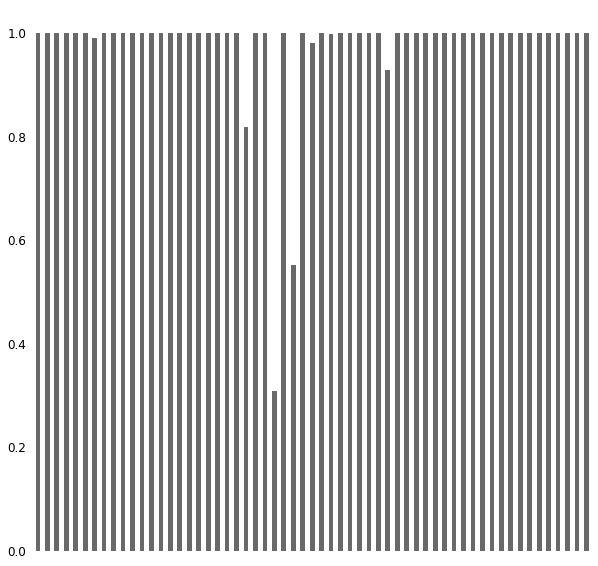

In [0]:
import missingno as msno

msno.bar(train_copy, figsize = (10, 10), fontsize = 12)

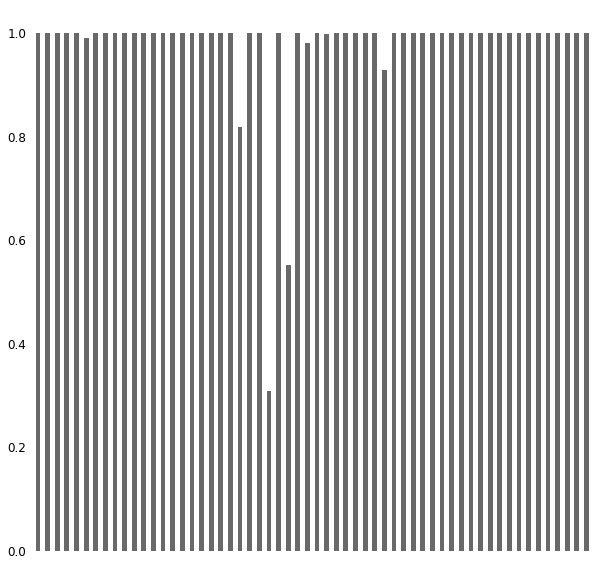

In [0]:
msno.bar(test_copy, figsize = (10, 10), fontsize = 12)

In [0]:
def missing(df, meta):
    missing = meta[meta.keep & meta.missing].index
  
    data = []
    for f in missing:
        count = (df[f] == -1).sum()
        perc = (count/df.shape[0] * 100).round(2)

        values = {
            'varname' : f,
            'count': count,
            'perc' : perc
        }
        data.append(values)
  
    missing_df = pd.DataFrame(data, columns = ['varname', 'count', 'perc'])
    missing_df.set_index('varname', inplace = True)
    missing_df.sort_values(by = 'count', inplace = True)

    return missing_df

In [16]:
missing(train, meta_train)

,count,perc
varname,,
ps_car_12,1,0.00
ps_car_02_cat,5,0.00
ps_car_11,5,0.00
ps_ind_04_cat,83,0.01
ps_car_01_cat,107,0.02
ps_ind_02_cat,216,0.04
ps_car_09_cat,569,0.10
ps_ind_05_cat,5809,0.98
ps_car_07_cat,11489,1.93


In [17]:
missing(test, meta_test)

,count,perc
varname,,
ps_car_11,1,0.00
ps_car_02_cat,5,0.00
ps_ind_04_cat,145,0.02
ps_car_01_cat,160,0.02
ps_ind_02_cat,307,0.03
ps_car_09_cat,877,0.10
ps_ind_05_cat,8710,0.98
ps_car_07_cat,17331,1.94
ps_car_14,63805,7.15


Text(0.5, 0, 'Target value')

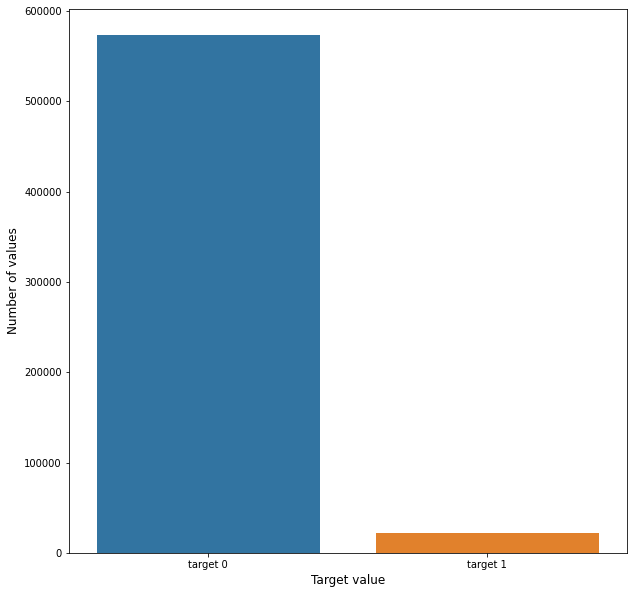

In [9]:
plt.subplots(figsize = (10, 10))
x = ['target 0', 'target 1']
y = train.target.value_counts().values
sns.barplot(x = x, y = y)
plt.ylabel('Number of values', fontsize = 12)
plt.xlabel('Target value', fontsize = 12)

## 결측치 대체

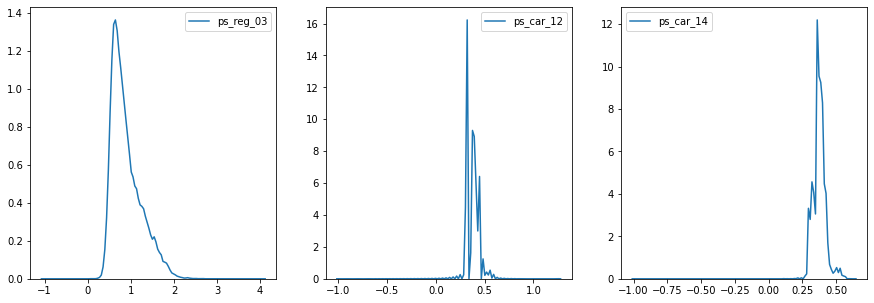

In [60]:
plt.subplots(1, 3, figsize = (15, 5))
i = 0
for col in float_cols:
    i += 1
    plt.subplot(1, 3, i)
    sns.kdeplot(train[col])

In [0]:
from sklearn.impute import SimpleImputer
mode_imp = SimpleImputer(missing_values = -1, strategy = 'most_frequent')
mean_imp = SimpleImputer(missing_values = -1, strategy = 'mean')

int_cols = meta_train[(meta_train.missing) & (meta_train.keep) & (meta_train.dtype == 'int64')].index
float_cols = meta_train[(meta_train.missing) & (meta_train.keep) & (meta_train.dtype == 'float64')].index

In [0]:
for col in int_cols:
    train[col] = mode_imp.fit_transform(train[[col]]).ravel()
    test[col] = mode_imp.fit_transform(test[[col]]).ravel()

In [0]:
for col in int_cols:
    train[col] = mean_imp.fit_transform(train[[col]]).ravel()
    test[col] = mean_imp.fit_transform(test[[col]]).ravel()

## PCA

In [0]:
import matplotlib.cm as cm
from sklearn.decomposition import PCA

In [0]:
var = meta_train[meta_train.keep & (meta_train.use == 'input')].index
X = train[var]
y = train.target

In [70]:
pca.explained_variance_ratio_

array([9.08597449e-01, 2.54441239e-02, 1.10364101e-02, 7.03357432e-03,
       6.28939497e-03, 6.09485445e-03, 5.33243019e-03, 4.53706513e-03,
       3.61000636e-03, 2.93946854e-03, 2.39474013e-03, 1.77633491e-03,
       1.66810345e-03, 1.49986057e-03, 1.48425519e-03, 1.29624978e-03,
       1.20635414e-03, 1.07378492e-03, 1.04051477e-03, 7.50884982e-04])

In [71]:
n_comp = 20

pca = PCA(n_components = n_comp,
          svd_solver = 'full',
          random_state = 2020)
X_pca = pca.fit_transform(X)

print('Explained variance : %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contribution :')

names = []
for i in range(n_comp):
  print('PCA', i+1,':', pca.explained_variance_ratio_[i])
  name = 'PCA' + str(i+1)
  names.append(name)

Explained variance : 0.9951
Individual variance contribution :
PCA 1 : 0.9085974486319369
PCA 2 : 0.025444123947509667
PCA 3 : 0.011036410104039837
PCA 4 : 0.007033574324229458
PCA 5 : 0.006289394969261231
PCA 6 : 0.006094854448788951
PCA 7 : 0.00533243019177046
PCA 8 : 0.004537065130337269
PCA 9 : 0.0036100063559979805
PCA 10 : 0.002939468537394201
PCA 11 : 0.0023947401340922597
PCA 12 : 0.0017763349106748884
PCA 13 : 0.0016681034539781467
PCA 14 : 0.0014998605679916847
PCA 15 : 0.0014842551902581064
PCA 16 : 0.001296249775047666
PCA 17 : 0.001206354138014998
PCA 18 : 0.0010737849227530803
PCA 19 : 0.0010405147663466964
PCA 20 : 0.0007508849822161379


Text(0.5, 1.0, 'Individual variance contribution')

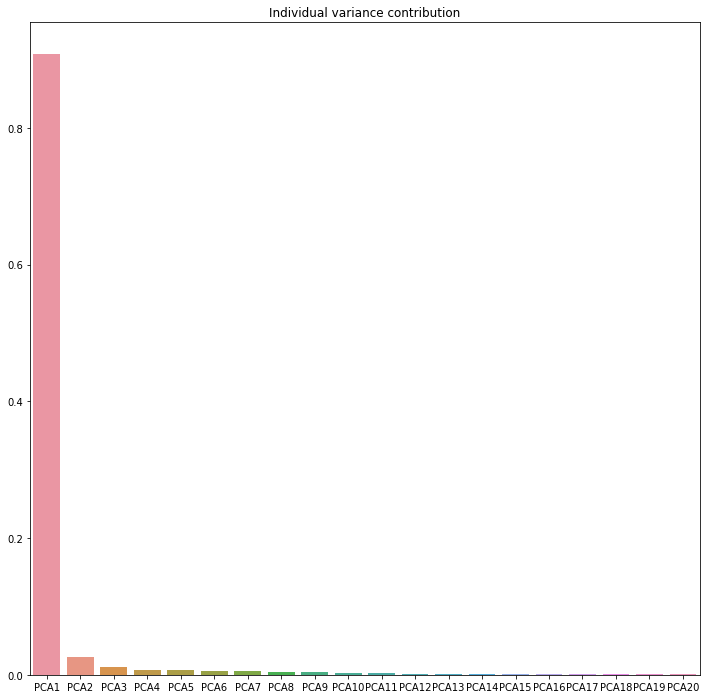

In [76]:
plt.subplots(figsize = (12, 12))
sns.barplot(x = names, y = pca.explained_variance_ratio_)
plt.title('Individual variance contribution')

Text(0, 0.5, 'Principal axis 2 - Explains 2.5 % of the variance')

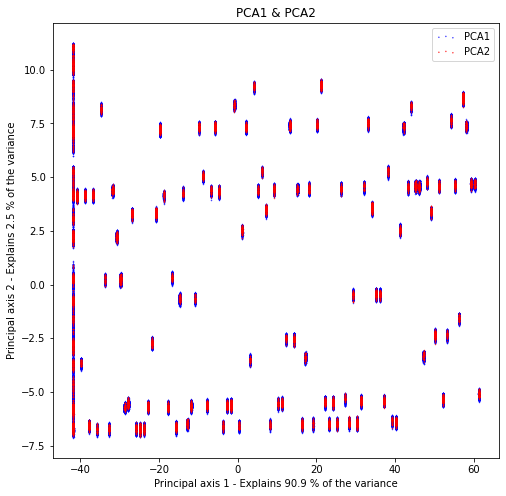

In [78]:
colors = ['blue', 'red']
plt.figure(figsize = (8, 8))

for color, i, target_name in zip(colors, [0,1], names):
  plt.scatter(X_pca[y == i, 0],
              X_pca[y == i, 1],
              color = color,
              s = 1,
              alpha = 0.8,
              label = target_name,
              marker = '.')
  
plt.legend(loc = 'best', shadow = False, scatterpoints = 3)
plt.title('PCA1 & PCA2')
plt.xlabel('Principal axis 1 - Explains %.1f %% of the variance'%(pca.explained_variance_ratio_[0] * 100))
plt.ylabel('Principal axis 2 - Explains %.1f %% of the variance'%(pca.explained_variance_ratio_[1] * 100))

## T-SNE

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 50000 samples in 0.367s...
[t-SNE] Computed neighbors for 50000 samples in 47.189s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities for sa

Text(0, 0.5, 'Y')

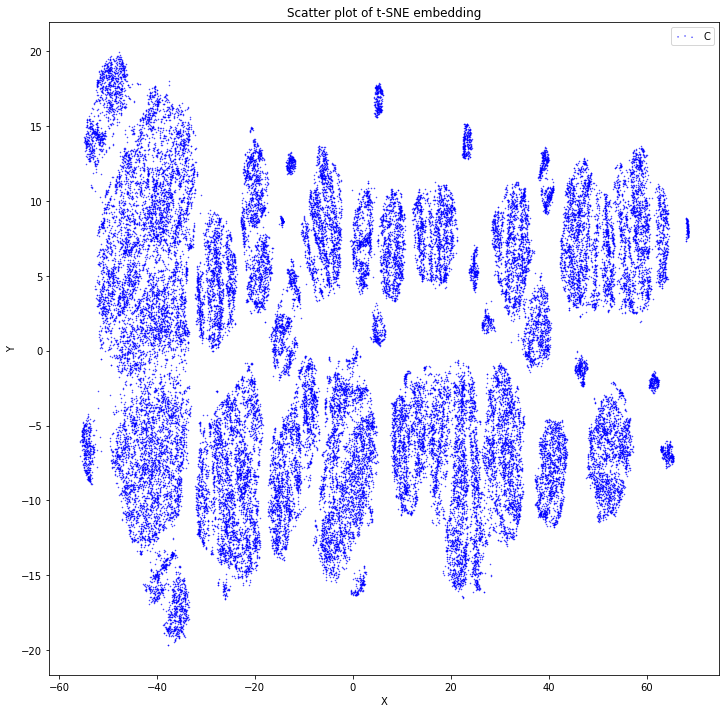

In [86]:
from sklearn.manifold import TSNE
train_df = train.sample(n = 50000)

X = train_df[var]
y = train_df.target

tsne = TSNE(n_components = 2,
            init = 'pca',
            random_state = 2020,
            perplexity = 30,
            method = 'barnes_hut',
            n_iter = 500,
            verbose = 1)

X_tsne = tsne.fit_transform(X)

plt.figure(2, figsize = (12, 12))

for color, i, names in zip(colors, [0, 1], names):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], color = color, s = 1,
                alpha = 0.8, label = names, marker = '.')
plt.legend(loc = 'best', shadow = False, scatterpoints = 3)
plt.title('Scatter plot of t-SNE embedding')
plt.xlabel('X')
plt.ylabel('Y')

## Reference
- [Dimensionality reduction (PCA, tSNE)](https://www.kaggle.com/tilii7/dimensionality-reduction-pca-tsne)